In [17]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [18]:
# 1. Loading Dataset
data = pd.read_csv('C:\\Users\\sanjh\\Downloads\\IMDb Movies India.csv', encoding='ISO-8859-1')

In [19]:
# 2. Data Exploration
print("First few rows of data:")
print(data.head())
print("\nDataset shape:", data.shape)
print("\nData Summary:")
print(data.describe())
print("\nData Information:")
data.info()

First few rows of data:
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3 

In [20]:
# 3. Identifying Missing Values
print("\nPercentage of Missing Values:")
print(data.isnull().mean() * 100)


Percentage of Missing Values:
Name         0.000000
Year         3.404475
Duration    53.317429
Genre       12.102650
Rating      48.939326
Votes       48.932878
Director     3.385131
Actor 1     10.426204
Actor 2     15.371720
Actor 3     20.272100
dtype: float64


In [21]:
# 4. Data Preprocessing

# 4.1 Handling Missing Values - Drop rows with missing values
data.dropna(inplace=True)
print("\nDataset shape after dropping missing values:", data.shape)



Dataset shape after dropping missing values: (5659, 10)


In [22]:
# 4.2 Converting 'Votes' column to integer after removing commas
data['Votes'] = data['Votes'].str.replace(',', '', regex=True).astype(int)

# 4.3 Clean 'Year' column to ensure it contains only integers
data['Year'] = data['Year'].str.extract(r'(\d+)').astype(int)

data['Duration'] = data['Duration'].str.replace(' min', '', regex=True).astype(int)

# 4.4 Removing Duplicates
data.drop_duplicates(inplace=True)
print("\nDataset shape after removing duplicates:", data.shape)


Dataset shape after removing duplicates: (5659, 10)


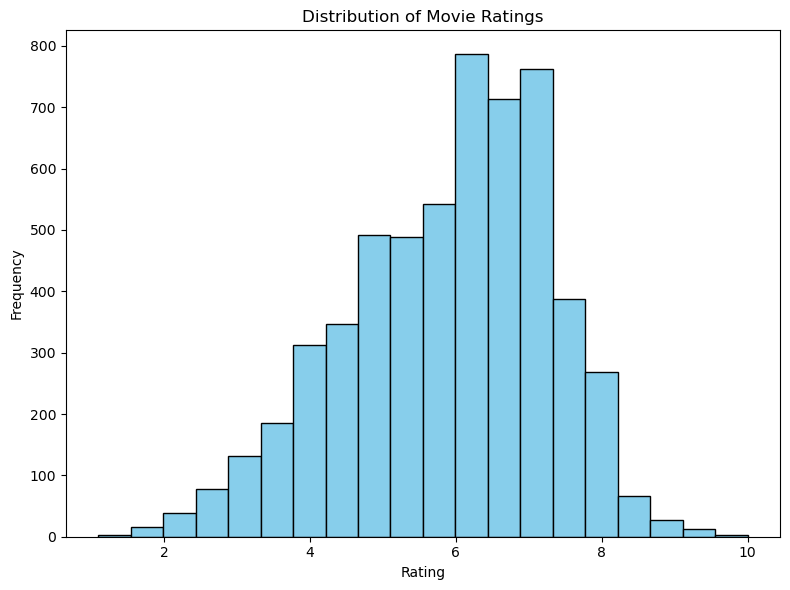

In [23]:
# 5. Data Visualization

# 5.1 Rating Distribution
plt.figure(figsize=(8, 6))
plt.hist(data['Rating'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Ratings')
plt.tight_layout()
plt.show()

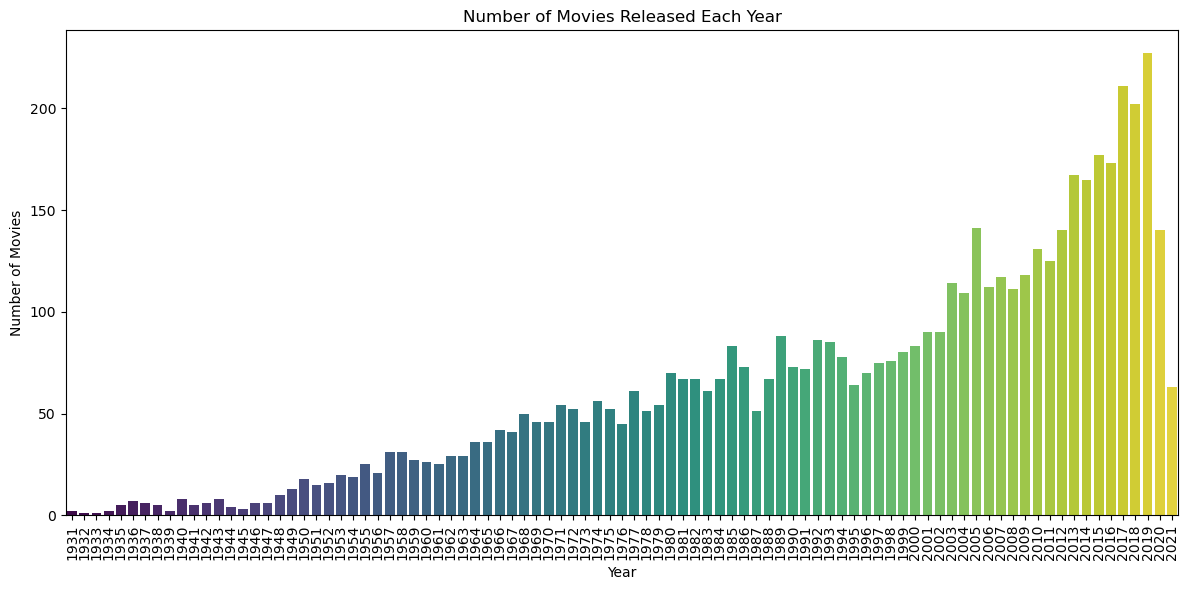

In [24]:

# 5.2 Count of Movies Released Each Year
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Year', hue='Year', palette="viridis", dodge=False, legend=False)
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released Each Year')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

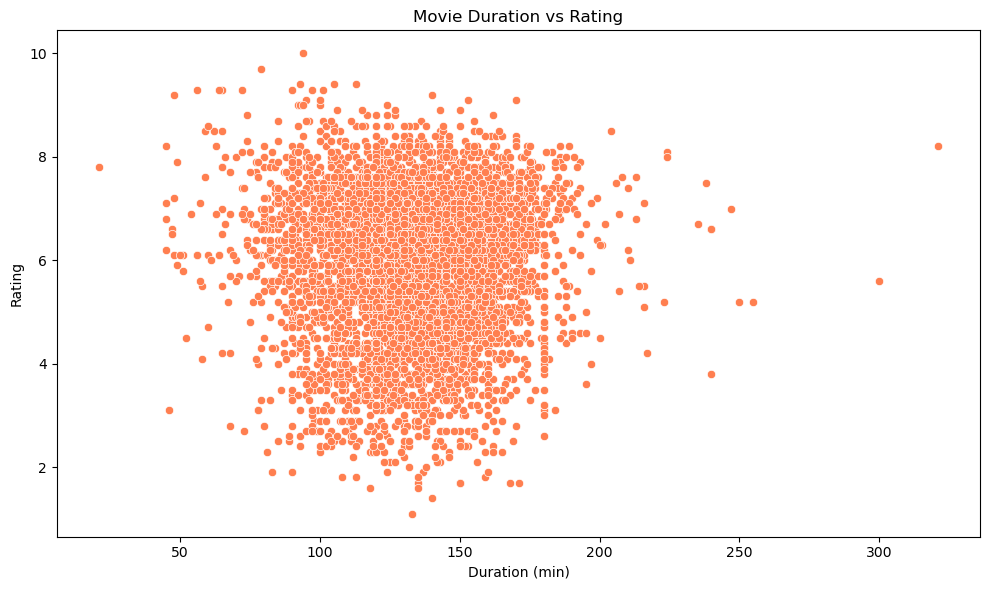

In [25]:
# 5.3 Movie Duration vs Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration', y='Rating', data=data, color="coral")
plt.xlabel('Duration (min)')
plt.ylabel('Rating')
plt.title('Movie Duration vs Rating')
plt.tight_layout()
plt.show()

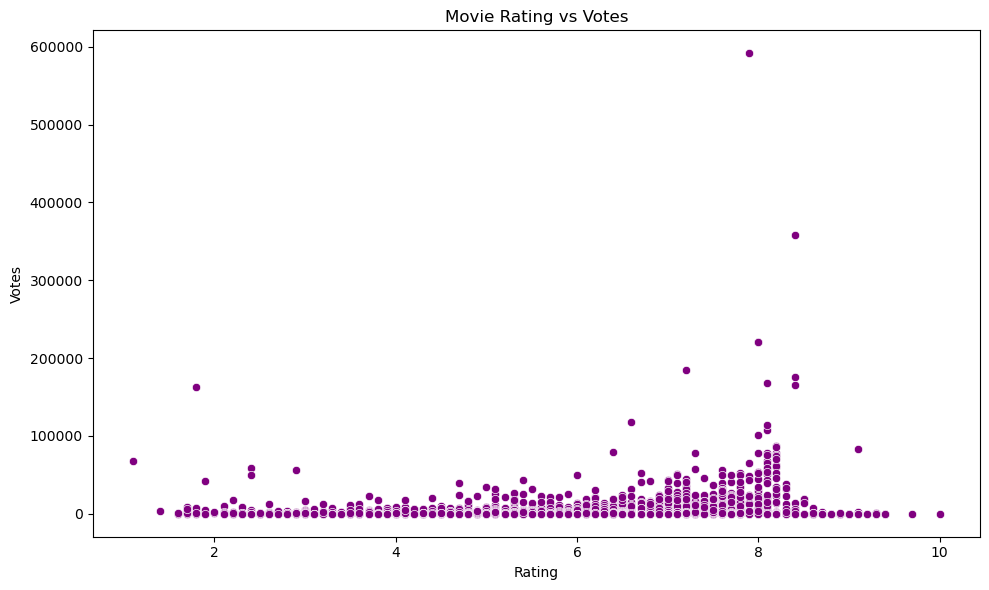

In [26]:
# 5.4 Movie Rating vs Votes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='Votes', data=data, color="purple")
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.title('Movie Rating vs Votes')
plt.tight_layout()
plt.show()

In [27]:
# 6. Encoding Text Data

# Label Encoding for 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'
label_cols = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
for col in label_cols:
    encoder = LabelEncoder()
    data[col] = encoder.fit_transform(data[col])

In [28]:
# 7. Splitting Dataset into Training and Testing

# Selecting features and target
X = data[['Year', 'Duration', 'Votes', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']]
y = data['Rating']

In [29]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [31]:
# 8. Model Selection and Training

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

In [32]:
# Training and Evaluation of Models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\nModel: {name}")
    print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
    print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R-squared Score:", r2_score(y_test, y_pred))



Model: Linear Regression
Mean Absolute Error: 1.0495625054893818
Root Mean Squared Error: 1.298614814540038
R-squared Score: 0.089290550521813

Model: Decision Tree
Mean Absolute Error: 1.2030035335689047
Root Mean Squared Error: 1.5737129465574542
R-squared Score: -0.33742726393948264

Model: Random Forest
Mean Absolute Error: 0.8533798586572436
Root Mean Squared Error: 1.13057175331745
R-squared Score: 0.30973572283085626

Model: Gradient Boosting
Mean Absolute Error: 0.8485658598846316
Root Mean Squared Error: 1.1141523262749617
R-squared Score: 0.3296397108004596


In [33]:

# 9. Model Selection Based on Best Performance
best_model = models["Gradient Boosting"]
y_pred_best = best_model.predict(X_test)

In [34]:
# 10. Final Model Evaluation and Insights
print("\nPerformance of Best Model (Gradient Boosting):")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_best))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred_best)))
print("R-squared Score:", r2_score(y_test, y_pred_best))



Performance of Best Model (Gradient Boosting):
Mean Absolute Error: 0.8485658598846316
Root Mean Squared Error: 1.1141523262749617
R-squared Score: 0.3296397108004596


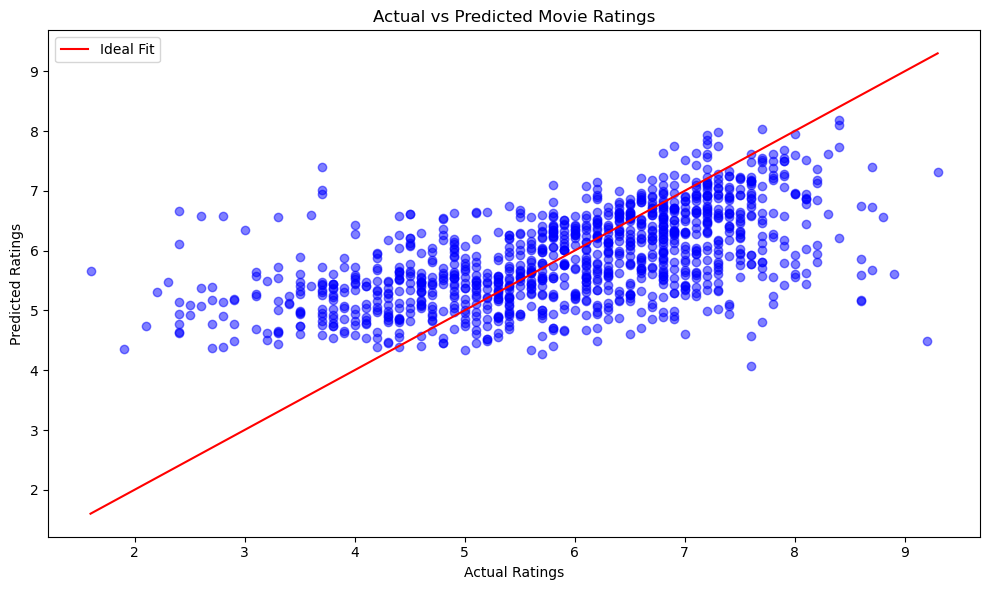

In [35]:
# Plotting Predicted vs Actual Ratings for Best Model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, color="blue", alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", label="Ideal Fit")
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Movie Ratings")
plt.legend()
plt.tight_layout()
plt.show()
